## Histogram with small multiple

This article shows how to create a [histogram](https://python-graph-gallery.com/histogram/) with small multiple using the Python library [Matplotlib](https://python-graph-gallery.com/matplotlib/). We address 2 scenarios:
- you want to represent the distribution of a large number of variables
- you want to represent the distribution of different groups within a single variable

For both of these scenarios, you may want to use **small multiple histogram**, where each variable/group has a small part of the global chart. This lets you easily visualize the distribution of a large number of variables/groups.

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the plot
- `numpy` is used to generate some data
- `pandas` for data manipulation

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Distribution of a large number of variables

### Dataset

In our case, we'll create a 4x4 window, for a total of 16 histograms. To do this, we need to generate 16 random variables.

To ensure that the variables are distributed differently, we'll randomly generate means and standard deviations using the numpy function `random.uniform()`. Our variable names will simply be *"Variable_1"*, *"Variable_2"*, etc.

In [2]:
# Number of variables wanted
num_variables = 16

# Initialize the list that will contains our variable parameters
columns = []
means = []
stds = []

# Generate random data for each variable
for i in range(num_variables):
    
    # Assign a name for each variable
    column_name = f"Variable_{i+1}" # Variable_1, Variable_2, etc
    columns.append(column_name)
    
    # Generate random mean and standard deviation for each variable
    mean = np.random.uniform(0, 100)
    std = np.random.uniform(5, 100)
    means.append(mean)
    stds.append(std)
    
# Generate random data for the DataFrame
data = np.random.normal(loc=means, scale=stds, size=(1000, num_variables))

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

### Small multiple plot

The following code creates a **4x4 grid** with a total of 16 histograms using small multiple. It does so in several steps:
- defines a 4x4 grid, for a total of 16 subplots
- iterates over our variables, add a title and an axis name
- remove extra subplots (it happens only if the number of variable is not equal to `num_rows*num_cols`)

Colors are generated using [matplotlib](https://python-graph-gallery.com/matplotlib/)'s `tab20` colormap. The `plt.tight_layout()` function is used to avoid overlap between subplots.

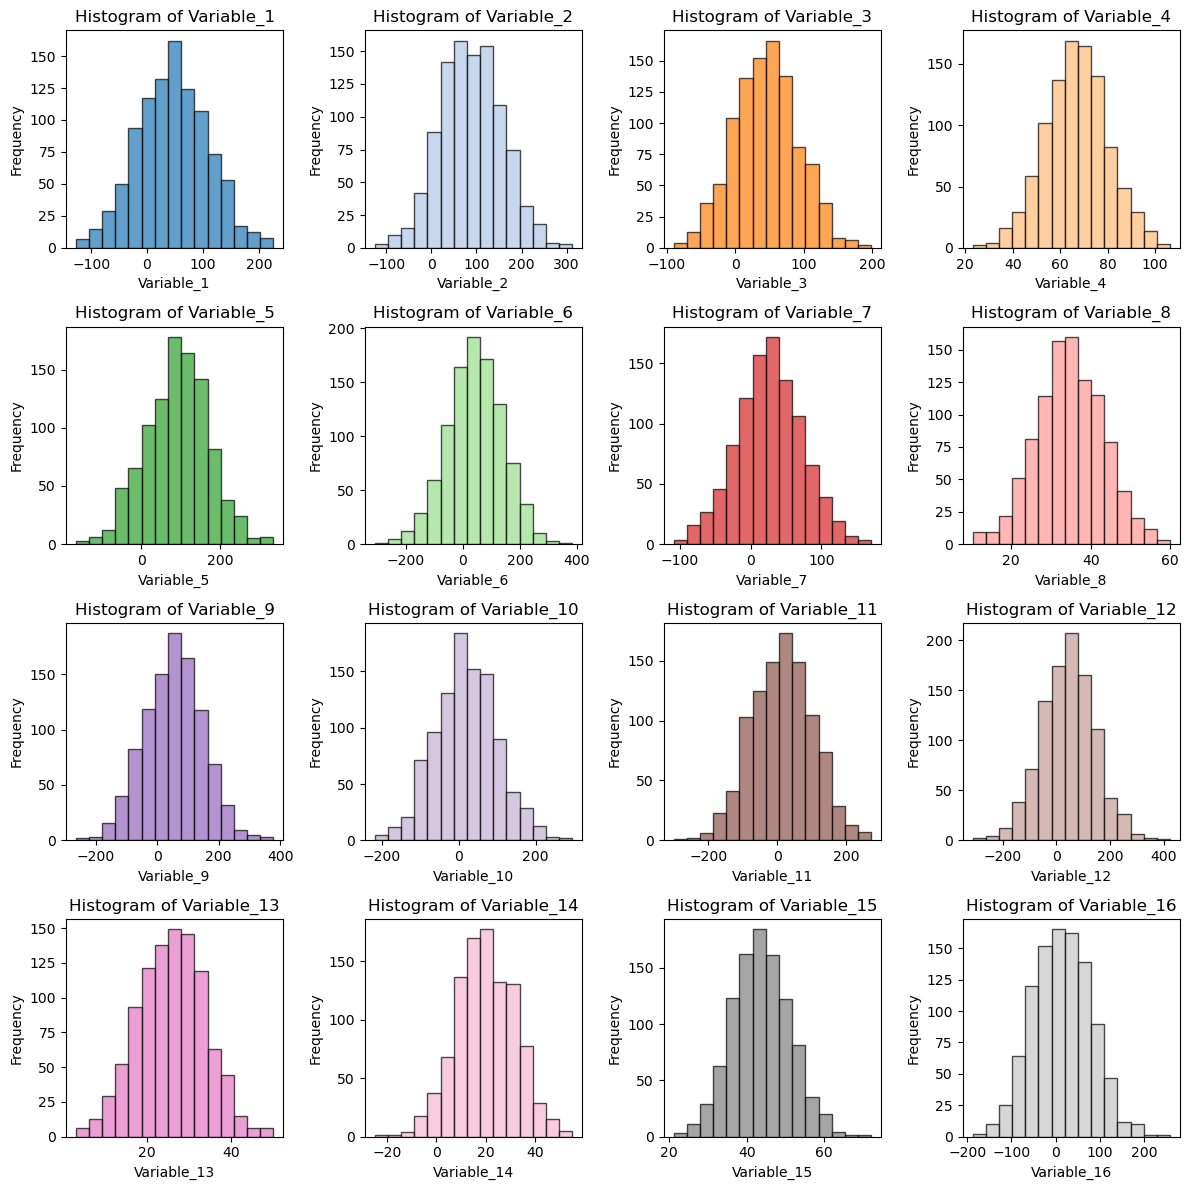

In [3]:
# Number of histograms to display
num_histograms = 16

# Create a 4x4 grid of subplots to accommodate 16 histograms
num_rows = 4
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array to iterate through subplots easily
axes_flat = axes.flatten()

# Get a list of (16) distinct colors from the tab20 colormap
colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, (column, ax) in enumerate(zip(df.columns, axes_flat)):
    df[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)

# Remove any extra empty subplots if the number of variables is less than 16
if i < num_histograms - 1:
    for j in range(i + 1, num_histograms):
        fig.delaxes(axes_flat[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Distribution of different groups within a single variable

### Dataset

This code generates a pandas DataFrame called `df` with two columns: `Continuous_Variable` and `Categorical_Variable`.

The `Continuous_Variable` column contains 1000 randomly generated continuous values drawn from a normal distribution with a mean of 10 and a standard deviation of 5.

The 'Categorical_Variable' column contains 1000 randomly chosen categories from a list of 16 different modalities, such as `Category_1`, `Category_2`, and so on.

The resulting DataFrame `df` contains 1000 rows and 2 columns, where each row represents a data point with a continuous value and a corresponding categorical value.

In [4]:
size = 1000

# Generating continuous variable
continuous_data = np.random.normal(loc=10, scale=5, size=size)

# Generating categorical variable with 16 different modalities
categories = ['Category_{}'.format(i) for i in range(1, 17)]
categorical_data = np.random.choice(categories, size=size)

# Creating pandas DataFrame
df = pd.DataFrame({
    'Continuous_Variable': continuous_data,
    'Categorical_Variable': categorical_data
})

### Small multiple plot

The following code creates a **4x4 grid** of subplots to plot histograms for each category of a categorical variable. It uses the `tab20` colormap to get a list of 16 distinct colors for the histograms. Then, it iterates over each category, retrieves the data corresponding to that category, plots a histogram using the data, and sets the title, x-axis label, and y-axis label for each subplot.

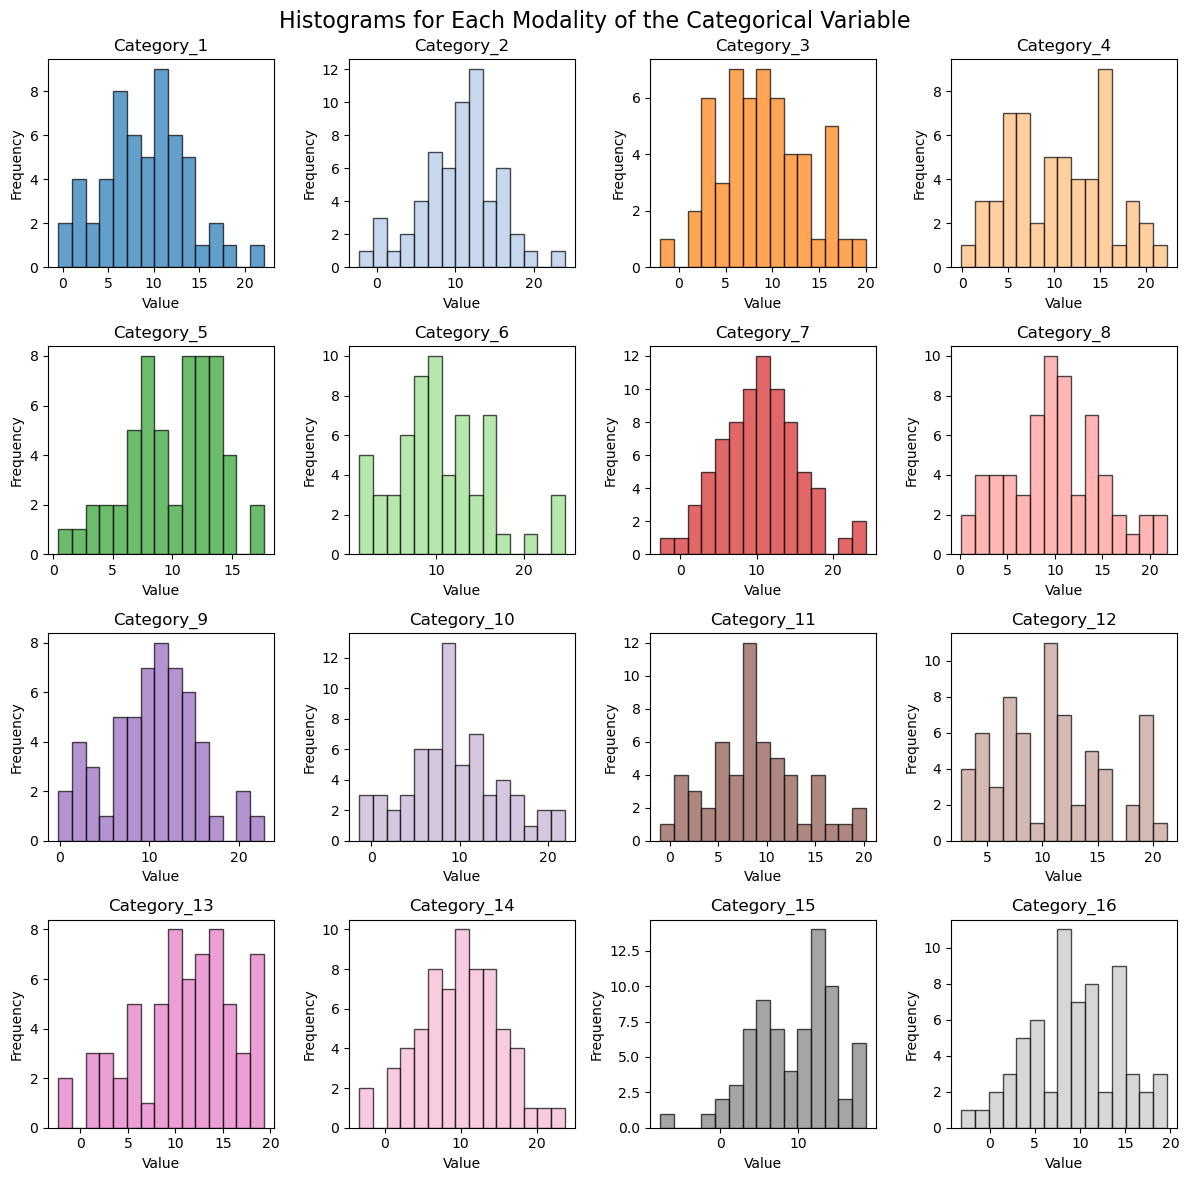

In [6]:
# Create a figure and 16 subplots (one for each category)
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Histograms for Each Modality of the Categorical Variable', fontsize=16)

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Get a list of (16) distinct colors from the tab20 colormap
colors = plt.cm.tab20.colors[:num_histograms]

# Iterate over each category and plot the histogram
for i, category in enumerate(categories):
    category_data = df[df['Categorical_Variable'] == category]['Continuous_Variable']
    axs[i].hist(category_data, bins=15, alpha=0.7, edgecolor="black", color=colors[i])
    axs[i].set_title(category)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## Going further

This post explained how to create histograms with small mutliple using matplotlib.

For more examples of how to customize your histogram, check the [histogram section](https://python-graph-gallery.com/histogram/). You might be interested in how to make a histogram with [seaborn](https://python-graph-gallery.com/seaborn/) for a better looking chart or even how to show several distribution with a [mirror histogram](https://python-graph-gallery.com/density-mirror/).